In [ ]:
pip install fastquant

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import backtrader as bt

In [ ]:
from fastquant import backtest,get_crypto_data
import numpy as np

In [ ]:
df = get_crypto_data("BTCUSDT",start_date='2021-01-01',end_date='2021-11-27', time_resolution='1h')

In [ ]:
df

,open,high,low,close,volume
dt,,,,,
2020-12-31 19:00:00,28872.24,29000.00,28742.41,28897.83,2293.821339
2020-12-31 20:00:00,28897.84,29139.65,28862.00,29126.70,1936.480299
2020-12-31 21:00:00,29126.71,29169.55,28900.79,28966.36,2524.473111
2020-12-31 22:00:00,28966.36,29143.73,28910.19,29100.84,1438.506326
2020-12-31 23:00:00,29100.83,29110.35,28780.00,28923.63,1976.419299
...,...,...,...,...,...
2021-11-26 20:00:00,54326.77,54584.74,54209.86,54515.70,988.351470
2021-11-26 21:00:00,54515.70,54568.99,53959.99,53973.04,1161.716830
2021-11-26 22:00:00,53973.04,54398.99,53800.00,54062.75,1200.550260


In [ ]:
import matplotlib.pyplot as pl
pl.style.use("default")

In [ ]:
import backtrader as bt
import backtrader.analyzers as btanalyzers

In [ ]:
from fastquant import CustomStrategy, BaseStrategy
from fastquant.indicators import MACD, CrossOver 
from fastquant.indicators.custom import CustomIndicator


# Create a subclass of the BaseStrategy, We call this MAMAStrategy (MACD + ALMA)
class MAMAStrategy(BaseStrategy):
    
    params = (  
        ("period", 14),  # period for the MACD
    )

    def __init__(self):
        # Initialize global variables
        super().__init__()
        
        self.Stochastic = bt.indicators.Stochastic(self.data)
        self.EMA = bt.indicators.EMA(self.data.close, period=14)

    
        

        print("===Strategy level arguments===")
        print("PARAMS: ", self.params)
        

    # Buy when the custom indicator is below the lower limit, and sell when it's above the upper limit
    def buy_signal(self):
        sto_buy =  self.Stochastic[0] < 30   # Close is above ALMA
        ema_buy = self.EMA[0] > self.data.close       # MACD crosses signal line upward
        
        
        return sto_buy and ema_buy 
    def sell_signal(self):
        sto_sell = 70 < self.Stochastic[0]
        ema_sell = self.EMA[0] < self.data.close

        return sto_sell and ema_sell 

===Strategy level arguments===
PARAMS:  <backtrader.metabase.AutoInfoClass_LineRoot_LineMultiple_LineSeries_LineIterator_DataAccessor_StrategyBase_Strategy_BaseStrategy_MAMAStrategy object at 0x000001701D00FE50>


<IPython.core.display.Javascript object>


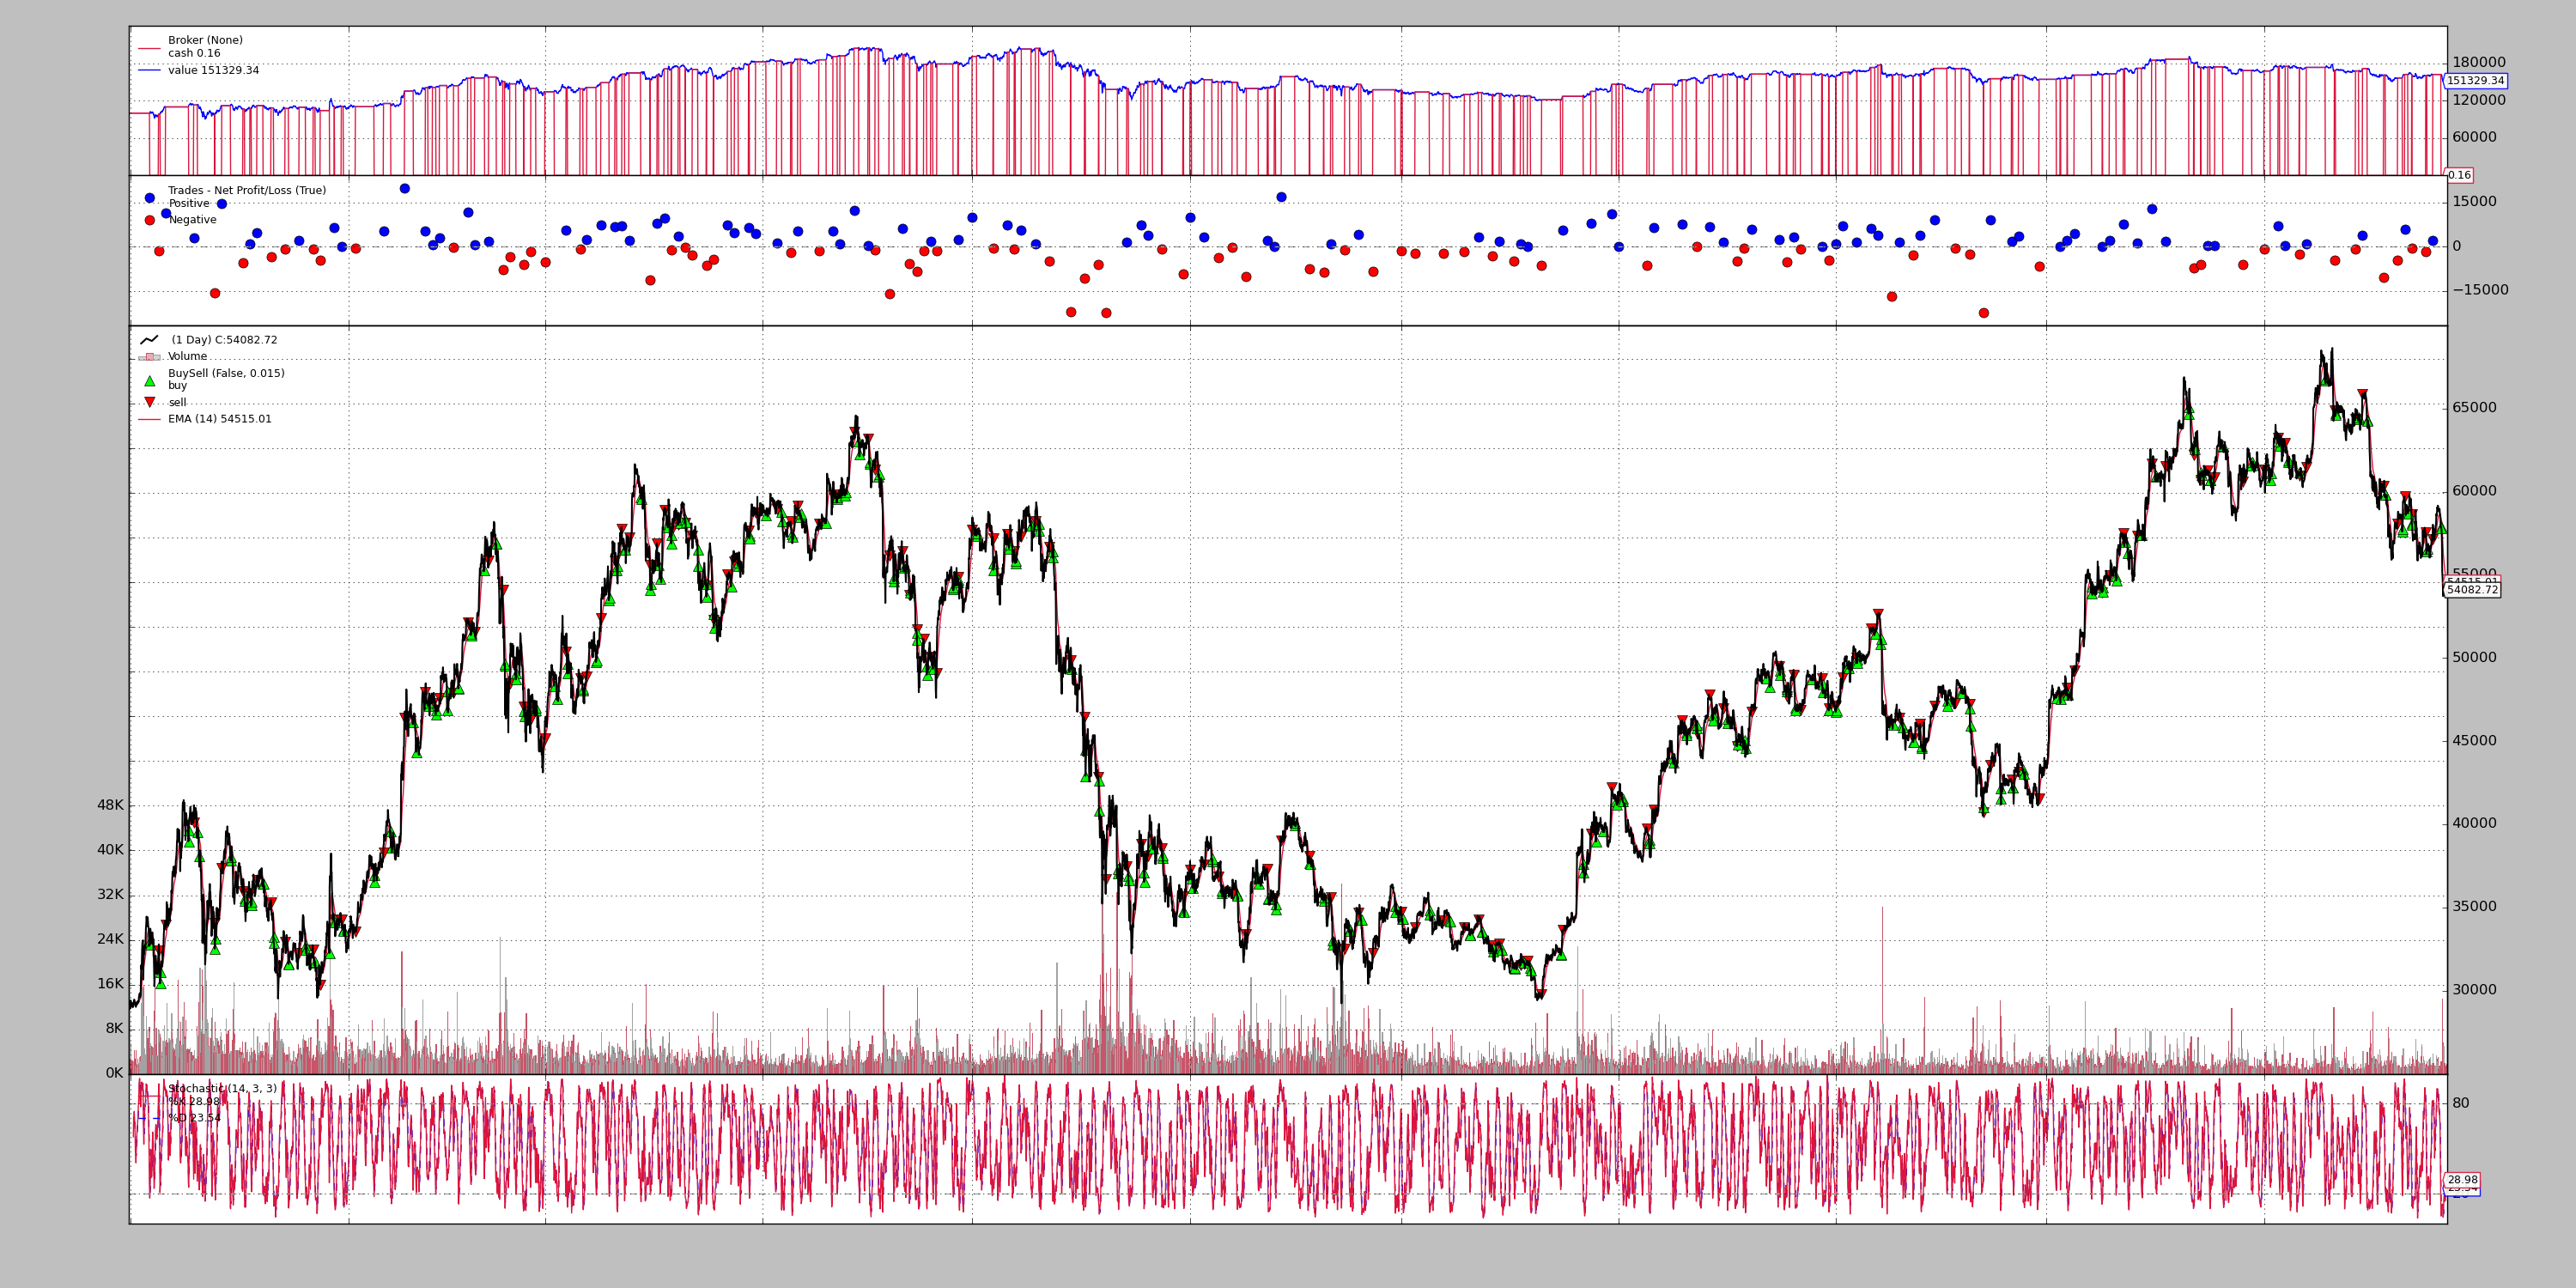

In [ ]:
results,history = backtest(MAMAStrategy, df ,init_cash=100000, verbose=False, return_history=True, fractional=True)

In [ ]:
results

,strat_id,init_cash,buy_prop,sell_prop,fractional,commission,stop_loss,stop_trail,take_profit,execution_type,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,True,0,0,0,0,close,...,96,76,4602.940495,4.60294,-4998.282517,-4.998283,19873.848652,19.873849,-22406.68609,-22.406686


In [ ]:
results.columns

Index(['strat_id', 'init_cash', 'buy_prop', 'sell_prop', 'fractional',
       'commission', 'stop_loss', 'stop_trail', 'take_profit',
       'execution_type', 'channel', 'symbol', 'allow_short', 'short_max',
       'add_cash_amount', 'add_cash_freq', 'invest_div', 'period', 'rtot',
       'ravg', 'rnorm', 'rnorm100', 'len', 'drawdown', 'moneydown', 'max',
       'maxdrawdown', 'maxdrawdownperiod', 'sharperatio', 'pnl', 'final_value',
       'total', 'win_rate', 'won', 'lost', 'won_avg', 'won_avg_prcnt',
       'lost_avg', 'lost_avg_prcnt', 'won_max', 'won_max_prcnt', 'lost_max',
       'lost_max_prcnt'],
      dtype='object')

In [ ]:
history['orders']

,strat_id,strat_name,dt,type,price,size,value,commission,pnl
0,0,,2021-01-03 18:00:00,buy,32909.27,3.035622,99900.099900,0.0,0.000000
1,0,,2021-01-03 19:00:00,buy,32769.76,0.003045,99.800300,0.0,0.000000
2,0,,2021-01-05 00:00:00,sell,32430.49,-3.038667,99999.900200,0.0,-1454.428288
3,0,,2021-01-05 06:00:00,buy,30436.25,3.234535,98447.124587,0.0,0.000000
4,0,,2021-01-05 07:00:00,buy,31123.25,0.003160,98.348776,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
501,0,,2021-11-24 04:00:00,buy,56399.99,2.832626,159760.096366,0.0,0.000000
502,0,,2021-11-24 05:00:00,buy,56560.02,0.002822,159.600496,0.0,0.000000
503,0,,2021-11-25 00:00:00,sell,57138.29,-2.835448,159919.696862,0.0,2092.959772
504,0,,2021-11-26 04:00:00,buy,57900.91,2.795310,161850.965268,0.0,0.000000


In [ ]:
results[['maxdrawdown', 'maxdrawdownperiod', 'sharperatio', 'pnl', 'win_rate']]

,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,win_rate
0,40.589604,225,0.961036,51329.34,0.554913
